<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Análisis de Componentes Principales</h1>
</div>

El **[Análisis de Componentes Principales (PCA)]((https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales))** es una técnica de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables no correlacionadas llamadas *componentes principales*. PCA es ampliamente utilizado para visualizar datos, eliminar redundancia y mejorar el desempeño de modelos de machine learning. En el contexto de la <b>Inteligencia Artificial (IA)</b>, PCA permite transformar grandes conjuntos de datos en representaciones más compactas, eliminando redundancias y conservando la mayor cantidad de información relevante posible.

Es una buena herramienta en IA por que:
- <b>Facilita el preprocesamiento de datos</b> para algoritmos de machine learning, mejorando la eficiencia y la velocidad de entrenamiento.</li>
<li><b>Reduce el ruido y la complejidad</b> en los datos, ayudando a los modelos a enfocarse en patrones realmente significativos.</li>
<li><b>Permite la visualización</b> de datos multidimensionales en 2D o 3D, lo que es clave para la interpretación y el análisis exploratorio.</li>
<li><b>Ayuda a evitar el sobreajuste</b> al eliminar variables irrelevantes o altamente correlacionadas.</li>

Tienen aplicaciones en prácticamente todas las áreas de la ciencia, **machine learning**, [procesamiento de imágenes](https://en.wikipedia.org/wiki/Image_processing), [ingeniería](https://es.wikipedia.org/wiki/Ingenier%C3%ADa), [genética](https://es.wikipedia.org/wiki/Gen%C3%A9tica), [computación cognitiva](https://en.wikipedia.org/wiki/Cognitive_computing), [química](https://es.wikipedia.org/wiki/Qu%C3%ADmica), [meteorología](https://es.wikipedia.org/wiki/Meteorolog%C3%ADa), y [redes neuronales](http://relopezbriega.github.io/tag/redes-neuronales.html), sólo por nombrar algunas; en dónde nos encontramos con grandes conjuntos de datos.

El propósito del [análisis de componentes principales PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales) es derivar un número relativamente pequeño de combinaciones lineales no correlacionadas (componentes principales) de una conjunto de variables aleatorias de [media](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) cero mientras que conserva la mayor cantidad de información de las variables originales como sea posible. 

Entre los objetivos del [PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales) podemos encontrar los siguientes:

1. [Reducción de dimensionalidad](https://en.wikipedia.org/wiki/Dimensionality_reduction).
2. Determinación de combinaciones lineales de variables.
3. Selección de características o *features*: la elección de las variables más útiles.
4. Visualización de datos multidimensionales.
5. Identificación de las variables subyacentes.
6. Identificación grupos de objetos o de [valores atípicos]
   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.datasets import load_iris



Recordemos que dada cualquier variable o característica, la cantidad de información en ella es proporcional a su varianza.

- si todos los datos son constantes, entonces su varianza es cero y también lo es su contenido de información. Si tenemos datos de muy alta dimensión, podemos reducir su dimensionalidad proyectándolo a lo largo de direcciones (o vectores) tales que la varianza a lo largo de la dirección elegida sea máxima para preservar la mayor cantidad de información posible en los datos.

El **Análisis de Componentes Principales** es un método para encontrar direcciones ortogonales de máxima varianza en los datos, de modo que si los datos se proyectan en esas direcciones, la varianza de los datos proyectados es máxima. La dimensionalidad de los datos puede reducirse proyectándolos en esas direcciones. Esta proyección a lo largo de la dirección de máxima varianza da la mínima pérdida de información.

Encontrar la dirección de máxima varianza para un conjunto de datos dado corresponde a encontrar el vector propio de la matriz de covarianza de los datos, esto lleva a una mínima pérdida de información si los datos se proyectan en esa dirección.

**Deducción**

Supongamos que se nos dan $N$ puntos de datos de $d$ dimensiones $\mathbf x_i, i=1...N$. Queremos encontrar el vector de dirección $\mathbf w$ tal que la proyección $z_i=\mathbf w^T \mathbf x_i$ para un punto $\mathbf x_i$ tenga máxima varianza. Para encontrar la dirección de máxima varianza, necesitaremos desarrollar una fórmula matemática que nos ayude a calcular la varianza de los datos después de haber sido proyectados a lo largo de cierta dirección para que podamos buscar la dirección de máxima varianza optimizando esa fórmula.

Calculemos la varianza después de proyectar los datos a lo largo de $\mathbf w$. Sabemos que la varianza de los valores $z_i, i=1...N$ es el valor esperado (promedio) de la desviación cuadrada $(z_i-\mu_z)$ respecto al valor medio $\mu_z = \frac{1}{N}\sum_{i=1}^{N}z_i=\frac{1}{N}\sum_{i=1}^{N}\mathbf w^T\mathbf x_i=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i=\mathbf w^T\mu_x$ donde $\mathbf{\mu_x}=\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i$ es el vector de $d$ dimensiones de valores promedio de todos los puntos de datos a lo largo de cada una de las $d$ dimensiones. Por lo tanto,

$$var(z)=var(\mathbf w^T \mathbf x)=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T \mathbf x_i-\mathbf w^T\mathbf\mu_x)^2]$$

$$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)]$$

$$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf x_i^T\mathbf w-\mathbf \mu_x^T \mathbf w)]$$

$$=\frac{1}{N}\sum_{i=1}^{N}[\mathbf w^T(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T\mathbf w]$$

$$=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]\mathbf w$$

$$=\mathbf w^T\mathbf C \mathbf w$$

Aquí, $\mathbf C=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]$ es la matriz de **"covarianza"** de tamaño $d \times d$. 

Recordando en las clases pasadas que la covarianza de dos variables $a$ y $b$ sobre $N$ valores $a_i,b_i, i=1...N$ está dada por $c(a,b) = \frac{1}{N}\sum_{i=1}^{N}[(a_i-\mu_a)(b_i-\mu_b)^T]$ y es una medida de la relación lineal entre dos variables (en este caso dos dimensiones de $\mathbf x$ o dos de nuestras características).

- La covarianza será **alta (positiva)** si el aumento en los valores de una variable por encima de su media se correlaciona con el aumento en los valores de la otra variable por encima de la media de la otra variable. 

- La covarianza será **alta (negativa)** si el aumento en los valores de una variable por encima de su media se correlaciona con la disminución en los valores de la otra variable por debajo de la media de la otra variable.

-  La covarianza será **baja (pequeña positiva o negativa)** si el aumento en los valores de una variable por encima de su media tiene poco efecto o poca correlación con el aumento en los valores de la otra variable por encima de la media de la otra variable.

Normalmente es mejor escalar las variables al mismo rango antes de calcular la covarianza para reducir los efectos de las diferencias en el rango de valores. Esto puede lograrse restando el valor de una variable de su media y dividiendo por su desviación estándar en un proceso llamado normalización media-desviación estándar (o estandarización).

Hasta ahora hemos expresado la varianza de los datos proyectados en términos de $\mathbf w$ usada para la proyección y la matriz de covarianza de los datos que puede calcularse de antemano. Nos interesa encontrar la dirección de máxima varianza ya que la proyección de los datos dados en esa dirección implica la mínima pérdida de información. Ahora, usando el principio de minimización de riesgo estructural, el problema de aprendizaje de encontrar el vector de dirección óptimo $w$ que minimiza la pérdida de información después de la proyección mientras asegura regularización puede escribirse como:

$$min_\mathbf w \alpha R(\mathbf w)+E(\mathbf w)$$

Donde $E$ es el término de error y $R$ controla la (inversa de) regularización. Como el error está inversamente relacionado con la varianza de $z$, podemos escribir este problema de aprendizaje como sigue:

$$min_\mathbf w \alpha ||\mathbf w||^2-var(z) \text{ (para } \alpha \geq 0)$$

o

$$min_\mathbf w \alpha \mathbf w^T\mathbf w -\mathbf w^TC\mathbf w$$

Aquí, queremos minimizar el valor de la norma de $\mathbf w$ mientras maximizamos la varianza.

Tomando la derivada respecto a $\mathbf w^T$ y sustituyendo a cero, obtenemos:

$$\mathbf C\mathbf w=\alpha \mathbf w$$

Nota que hay una solución trivial a esto $\mathbf w = \mathbf 0$. Sin embargo, al restringir $||\mathbf w||=1$, podemos encontrar una solución no trivial. Para este propósito, la ecuación anterior es un problema de valores propios con vector propio $\mathbf w$ y valor propio $\alpha$. 

- Un vector propio $\mathbf w$ es una propiedad de una matriz $\mathbf C$ tal que el vector resultante de la multiplicación matricial $\mathbf C\mathbf w$ está en la misma dirección que $\mathbf w$ solo con un escalamiento por un factor constante correspondiente $\alpha$ llamado valor propio. El número de valores y vectores propios es igual al número de dimensiones de la matriz. Estos vectores de una matriz de covarianza se llaman componentes principales ya que corresponden a direcciones de varianza máxima. De ahí el nombre "Análisis de Componentes Principales".

Así, la dirección de máxima varianza $\mathbf w$ corresponde al vector propio de la matriz de covarianza $\mathbf C$. Así, si encontramos los vectores propios de la matriz de covarianza, ¡podemos obtener lo que queremos! 

### Valores y Vectores Propios

La multiplicación de una matriz por un vector puede interpretarse como una transformación del punto representado en el vector: $$\mathbf y =\mathbf A\mathbf x$$. 

Aquí, el punto $\mathbf x$ ha sido transformado a $\mathbf y$ mediante su multiplicación con la matriz $\mathbf A$. 

La transformación puede ser un escalamiento, proyección, etc., lo que puede cambiar la dirección del punto $\mathbf x$, es decir, los vectores de dirección de $\mathbf x$ y $\mathbf y$ pueden ser diferentes. Sin embargo, existen algunos puntos "característicos" $\mathbf v$ asociados con la matriz, que solo sufren un cambio de escala, es decir, $\mathbf w =\mathbf A\mathbf v = \lambda \mathbf v$. 

Como $\mathbf w = \lambda \mathbf v$,  $\mathbf w$ y $\mathbf v$ son paralelos o ortogonales entre sí, con solo un escalamiento por un factor multiplicativo $\lambda$ resultante de la transformación. Tales puntos o vectores se llaman vectores propios ("eigen" significa "característico" en alemán), mientras que los escalares asociados se llaman valores propios.

A continuación, ilustramos esto en Python con un ejemplo simple. Tomamos 4 puntos en los ejes canónicos y usamos una matriz para transformar estos puntos: $\mathbf q_i = \mathbf T \mathbf p_i$. Observa que para la matriz original, los vectores de dirección de los cuatro puntos solo sufren un escalamiento (por 2). 

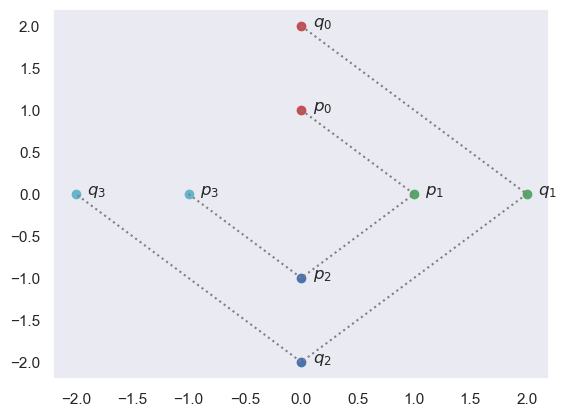

In [4]:
import string
color_lut = 'rgbc'

# cmatriz de transformación solo escalamiento
T = np.array([[2, 0], [0, 2]])


a, b, c, d = (0, 1), (1, 0), (0, -1), (-1, 0)
# matriz con vectores renglones
X = np.vstack([a, b, c, d])

# Plots de los puntos
def showPoints(A,head='p'):
    for i,xy in enumerate(A[:,:2]):
        x,y = xy
        plt.scatter(x, y, color=color_lut[i])
        plt.text(x + 0.1, y, '$'+head+'_'+str(int(i))+'$')
    plt.plot(A[:,0],A[:,1],color="gray", linestyle='dotted')
    
def showV(V,linestyle=None):
    for i in range(V.shape[1]):
        plt.arrow(0,0,0.8*V[0,i],0.8*V[1,i],color=color_lut[i],head_width=0.1,linestyle=linestyle)


showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

Vamos a encontrar los valores propios y los vectores propios de la matriz dada y graficarlos sobre la gráfica anterior.

Matriz Original:
 [[2 0]
 [0 2]]
Eigen values: [2. 2.]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


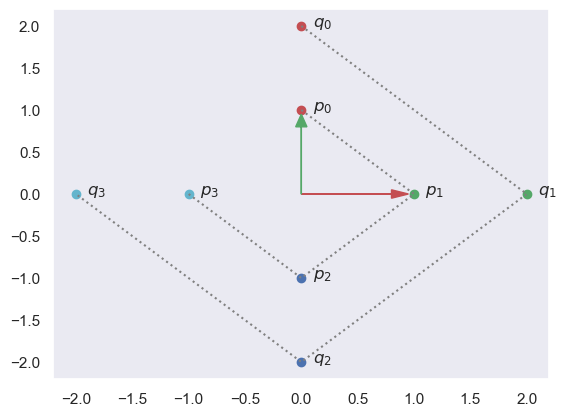

In [5]:
e,V = np.linalg.eig(T)
print("Matriz Original:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

se puede observar que hay dos vectores propios que corresponden a las columnas de la matriz V. Además, nota que los vectores propios son vectores unitarios (con norma 1.0). Los dos vectores propios son paralelos a los puntos $p_0$ y $p_1$.

Para verificar que la transformación de la matriz solo escala los vectores propios y que además lo hace por la cantidad dictada por sus valores propios, vamos a graficar los vectores propios originales y los puntos resultantes de transformar estos puntos por multiplicación matricial: $\mathbf w_i = \mathbf T \mathbf v_i$.

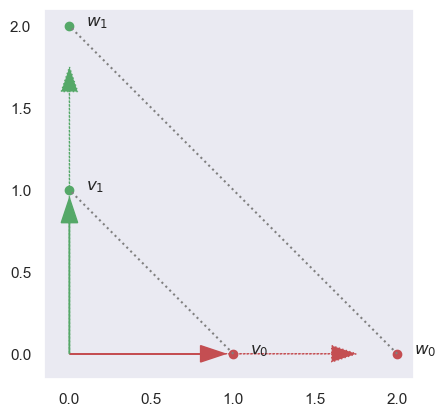

In [6]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.axis('square');plt.show()

Observa que en la gráfica anterior los puntos solo sufren un escalamiento de 2.0. Así, estos vectores propios (y sus valores propios) son una característica de la matriz dada. Si la matriz cambia, los vectores y valores propios resultantes serán diferentes, como se muestra a continuación.

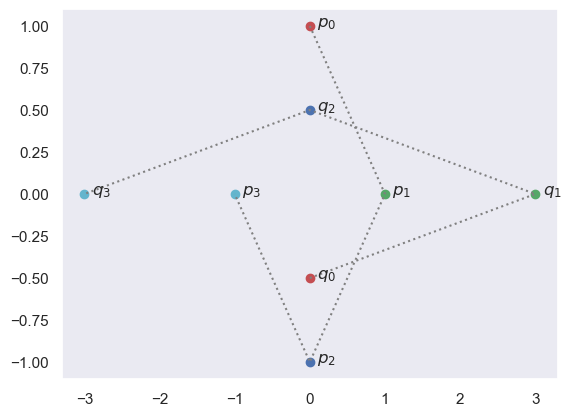

In [7]:
T = np.array([[3, 0], [0, -0.5]])
showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

Matriz original:
 [[ 3.   0. ]
 [ 0.  -0.5]]
Eigen values: [ 3.  -0.5]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


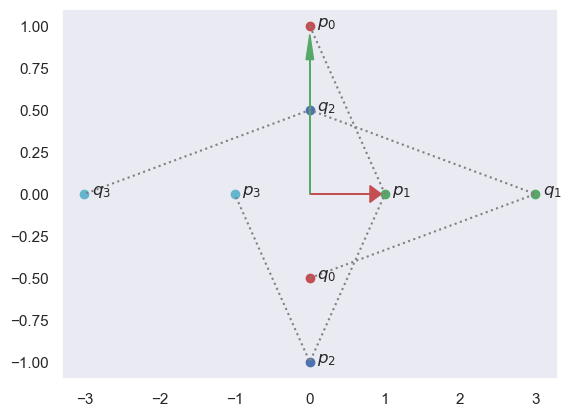

In [8]:
e,V = np.linalg.eig(T)
print("Matriz original:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

Los dos vectores propios son paralelos a los puntos $p_0$ y $p_1$.

Graficamos los puntos originales y los vectores propios transformados abajo para su verificación.

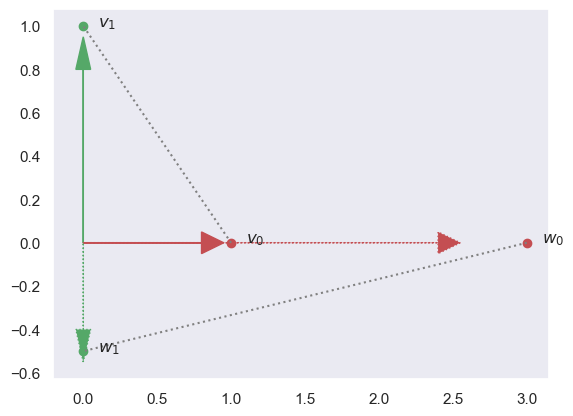

In [9]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.show()

### Descomposición en valores propios (Eigen Decomposition)

Dado que:

$$\mathbf w_i = \mathbf T \mathbf v_i = \lambda_i \mathbf v_i$$

Por lo tanto, si $\mathbf V = [\mathbf v_1 | \mathbf v_2, ... | \mathbf v_k]$ y $\mathbf\Lambda$ es una matriz diagonal de valores propios, entonces:

$$\mathbf T \mathbf V= \mathbf V \mathbf\Lambda$$

Así,

$$\mathbf T =\mathbf V \mathbf \Lambda \mathbf V^{-1}$$

Por lo tanto, la matriz original puede escribirse en términos de sus valores y vectores propios, lo que se llama su descomposición en valores propios.

In [10]:
print("Matriz original:\n",T)
print("Matriz reconstruida apartir de la descomposición de los eigenvalores\n",V@np.diag(e)@np.linalg.inv(V))

Matriz original:
 [[ 3.   0. ]
 [ 0.  -0.5]]
Matriz reconstruida apartir de la descomposición de los eigenvalores
 [[ 3.   0. ]
 [ 0.  -0.5]]


## Resumen de la transformación de PCA

Dado un conjunto de datos $X$ de $n$ observaciones y $p$ variables:

1. **Estandariza los datos:**

$$
Z_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
donde $\mu_j$ es la media y $\sigma_j$ la desviación estándar de la variable $j$.

2. **Calcula la matriz de covarianza:**

$$
C = \frac{1}{n-1} Z^T Z
$$

3. **Obtén los autovalores ($\lambda$) y autovectores ($v$) de $C$:**

$$
C v = \lambda v
$$

4. **Ordena los autovectores según los autovalores de mayor a menor.**

5. **Proyecta los datos originales en los autovectores seleccionados:**

$$
Y = Z V_k = \mathbf V^T \mathbf Z
$$
donde $V_k$ son los $k$ autovectores principales (componentes principales).

la matriz de componentes principales y su transpuesta son inversas entre sí, es decir, $\mathbf {v}^{-1}=\mathbf {v}^{T}$ o $\mathbf {v}^{T}\mathbf v=\mathbf I$.

Para calcular la proyección inversa. las proyecciones pueden escribirse como $\mathbf Y = \mathbf V^T \mathbf Z$, por lo tanto, la proyección inversa (reproyección) puede escribirse como $\mathbf Z^r = \mathbf {V}^{-1} \mathbf Y$. Ya sabemos que $\mathbf {V}^{-1} = \mathbf {V}^{T}$. Podemos usar esto para calcular la transformación inversa usando $\mathbf Z^r = \mathbf {V}^{-1} \mathbf Y = \mathbf {V}^{T} \mathbf Y $. En forma matricial tenemos $\mathbf Z^r = \mathbf Y \mathbf V^T$.

### Algoritmo de PCA aplicado al dataset Iris

Utilizaremos el famoso dataset Iris para ilustrar el proceso manual de PCA paso a paso.

In [10]:
# Cargar datos 
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 1. Estandarización
X_std = (X - X.mean()) / X.std()
print('Primeras filas de los datos estandarizados:')
print(X_std.head())

Primeras filas de los datos estandarizados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.897674          1.015602          -1.335752         -1.311052
1          -1.139200         -0.131539          -1.335752         -1.311052
2          -1.380727          0.327318          -1.392399         -1.311052
3          -1.501490          0.097889          -1.279104         -1.311052
4          -1.018437          1.245030          -1.335752         -1.311052


In [11]:
# 2. Matriz de covarianza
cov_matrix = np.cov(X_std.T)
print('Matriz de covarianza:')
print(cov_matrix)

Matriz de covarianza:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [12]:
# 3. Autovalores y eigen valores
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('eigen valores:', eig_vals)
print('eigen vectores (columnas):')
print(eig_vecs)

eigen valores: [2.91849782 0.91403047 0.14675688 0.02071484]
eigen vectores (columnas):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


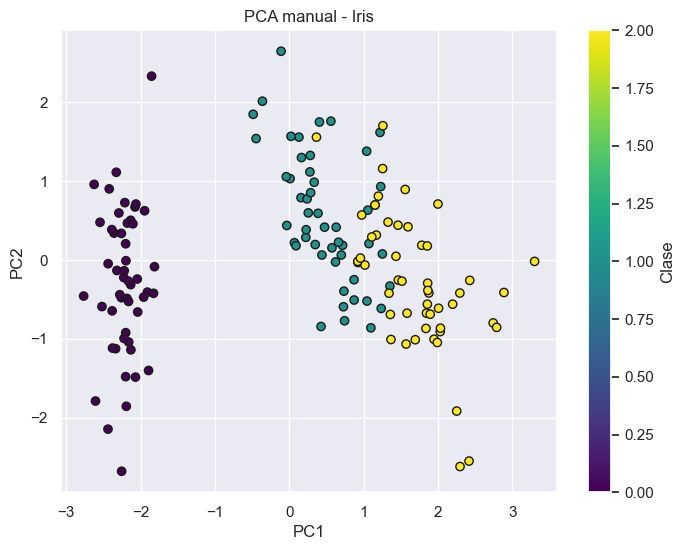

In [13]:
# 4. Ordenar autovectores según autovalores
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# 5. Proyección a los dos primeros componentes principales
X_pca_manual = np.dot(X_std, eig_vecs[:, :2])

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca_manual[:,0], X_pca_manual[:,1], c=iris.target, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA manual - Iris')
plt.colorbar(label='Clase')
plt.show()



### Clase para PCA

In [51]:
#Agregar a la librería
class PCA:
    def __init__(self, n_components):
        self.n_components=n_components
        self.components = None
        self.mean = None
        self.ratio = None
    
    def fit(self,X):
       return None
        
    def transform(self,X):
        #Proyección al nuevo espacio
        return None
    
    def get_ratio(self):
        return None

    def plot_explained_variance_ratio(self, percentage=1):
        #Plotear la varianza explicada acumulada
        

In [52]:
#Instanciamos un obj de la clase PCA


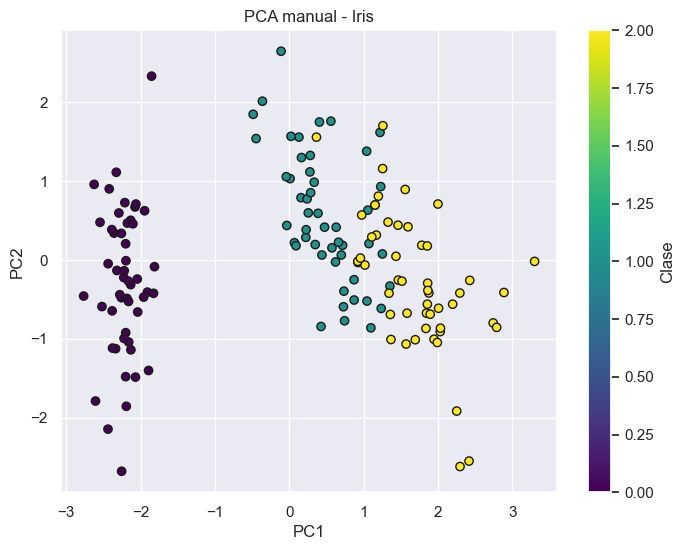

In [55]:
# Visualización


### PCA usando librerías de Python (scikit-learn)

La librería `scikit-learn` facilita el cálculo de PCA con la clase `PCA`.

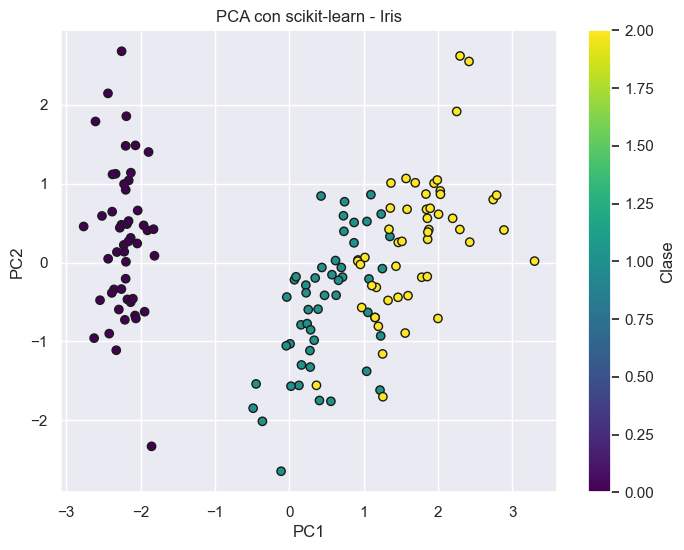

In [57]:
from sklearn.decomposition import PCA


### PCA para visualización: Dígitos escritos a mano

La utilidad de la reducción de dimensionalidad puede no ser completamente evidente en solo dos dimensiones, pero se vuelve mucho más clara al observar datos de alta dimensión.
Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los datos de dígitos

In [58]:
# Load the data
digits_data = datasets.load_digits()
n = len(digits_data.images)


In [60]:
# etiquetas


array([0, 1, 2, ..., 8, 9, 8])

Los datos aquí consisten en imágenes de 8×8 píxeles, lo que significa que son de 64 dimensiones.

In [61]:
# Cada imagen se representa como un arreglo de 8x8 pixeles
# Flatten .


(1797, 64)

Para obtener una intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [65]:
# proyectar de 64 a 2 dimensiones


(1797, 64)
(1797, 2)


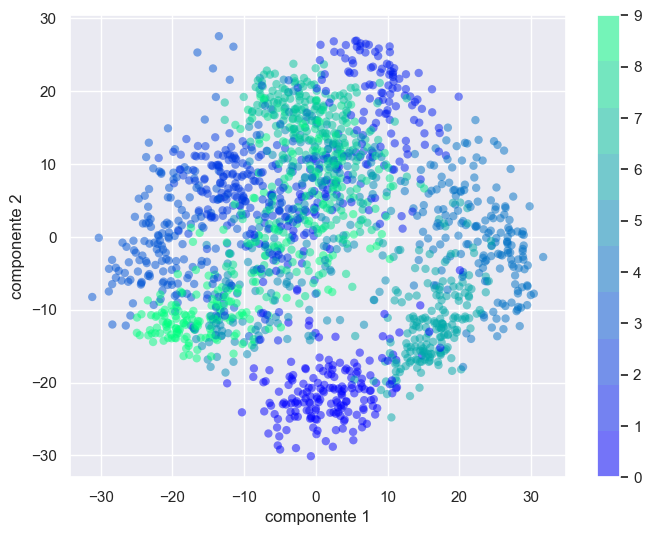

In [66]:
#Ahora podemos graficar los dos primeros componentes principales de cada punto para aprender sobre los datos:


los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con mayor varianza.
Esencialmente, hemos encontrado el estiramiento y rotación óptimos en el espacio de 64 dimensiones que nos permite ver la disposición de los dígitos en dos dimensiones.

### ¿Qué significan los componentes?

Podemos preguntarnos qué *significan* las dimensiones reducidas.

Este significado puede entenderse en términos de combinaciones de vectores base.

Por ejemplo, cada imagen en el conjunto de entrenamiento se define por una colección de 64 valores de píxeles, que llamaremos el vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma de pensar en esto es en términos de una base de píxeles.
Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe, y luego sumamos los resultados para construir la imagen:

$$
{\rm imagen}(x) = x_1 \cdot{\rm (píxel~1)} + x_2 \cdot{\rm (píxel~2)} + x_3 \cdot{\rm (píxel~3)} \cdots x_{64} \cdot{\rm (píxel~64)}
$$

Una forma en que podríamos imaginar reducir la dimensión de estos datos es eliminando todos menos unos pocos de estos vectores base.
Por ejemplo, si usamos solo los primeros ocho píxeles, obtenemos una proyección de los datos de ocho dimensiones, pero no es muy representativa de toda la imagen: ¡hemos descartado casi el 90% de los píxeles!

![](Figures/05.09-digits-pixel-components.png)

La fila superior muestra los píxeles individuales, y la fila inferior muestra la contribución acumulada de estos píxeles a la construcción de la imagen.
Usando solo ocho de los componentes base de píxeles, solo podemos construir una pequeña parte de la imagen de 64 píxeles.
Si continuáramos esta secuencia y usáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación por píxeles no es la única elección de base. También podemos usar otras funciones base, que contienen alguna contribución predefinida de cada píxel, y escribir algo como

$$
imagen(x) = {\rm media} + x_1 \cdot{\rm (base~1)} + x_2 \cdot{\rm (base~2)} + x_3 \cdot{\rm (base~3)} \cdots
$$

PCA puede considerarse como un proceso de elegir funciones base óptimas, de modo que sumar solo las primeras de ellas sea suficiente para reconstruir adecuadamente la mayoría de los elementos en el conjunto de datos.
Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos en esta serie.
Esta figura muestra una representación similar de la reconstrucción de este dígito usando la media más las primeras ocho funciones base de PCA:

![](Figures/05.09-digits-pca-components.png)


A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características más importantes de la imagen de entrada con solo la media más ocho componentes.
La cantidad de cada píxel en cada componente es el análogo de la orientación del vector en nuestro ejemplo bidimensional.
En este sentido, PCA proporciona una representación de baja dimensión de los datos.

### ¿Cómo elegir el número de componentes?

Una parte vital de usar PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
Esto puede determinarse observando la **varianza explicada acumulada**como función del número de componentes:

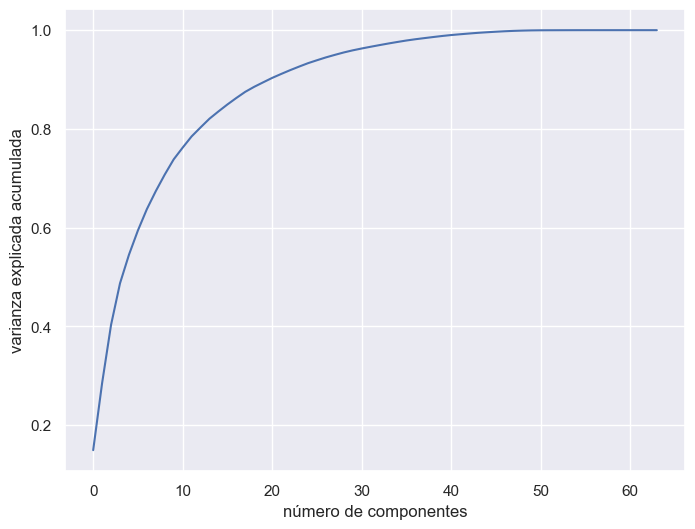

Esta curva cuantifica cuánta de la varianza total, de 64 dimensiones, está contenida dentro de los primeros $N$ componentes.
Por ejemplo, vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que necesitas alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (según la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90% de la varianza. Observar este gráfico para un conjunto de datos de alta dimensión puede ayudar a entender el nivel de redundancia presente en múltiples observaciones.

In [68]:
#Entrenamos el algoritmo con al menos un 80% total de varianza 


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

Text(0.5, 0, 'PC3')

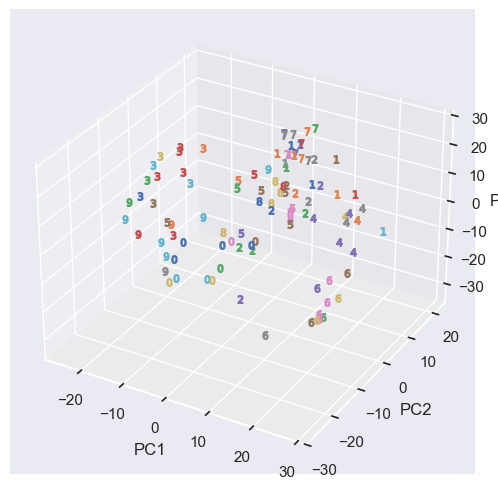

### PCA como filtrado de ruido

PCA también puede usarse como un enfoque de filtrado para datos ruidosos.

La idea es esta: 
- cualquier componente con varianza mucho mayor que el efecto del ruido debería ser relativamente poco afectado por el ruido.

Así que si se reconstruye los datos usando solo el subconjunto más grande de componentes principales, se debería mantener preferentemente la señal y el ruido sería eliminado.


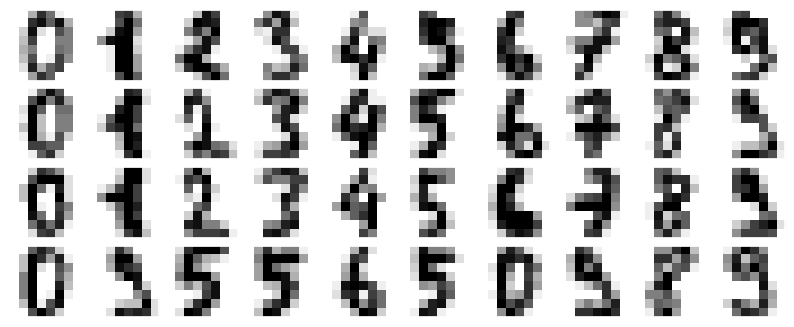

In [71]:
#Datos originales sin ruido:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(image_data)

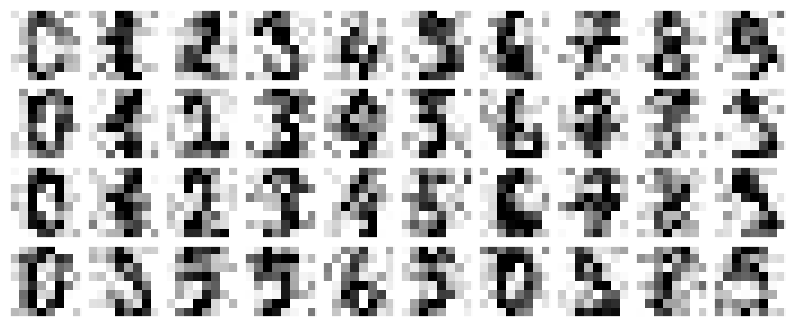

In [72]:
# Ahora agreguemos algo de ruido aleatorio
np.random.seed(42)
image_data_noisy = np.random.normal(image_data, 4)
plot_digits(image_data_noisy)

In [73]:
# Entrenemos un PCA en los datos ruidosos, solicitando que la proyección preserve el 50% de la varianza:


12

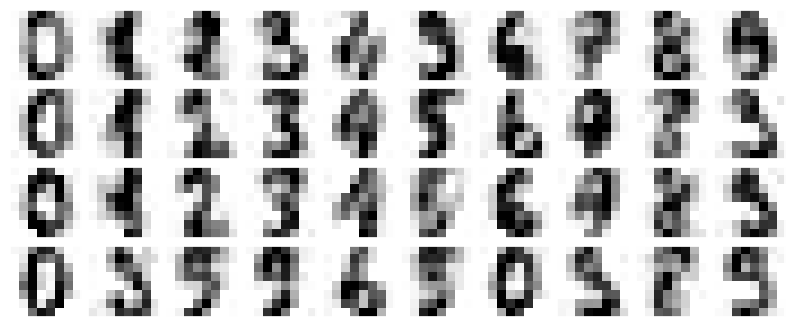

Esta propiedad de preservar la señal/filtrar el ruido hace que PCA sea una rutina muy útil para la selección de características, por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensión, podrías entrenar el clasificador en la representación de menor dimensión, lo que automáticamente servirá para filtrar el ruido aleatorio en las entradas.

### Variantes de PCA
Existen variantes de PCA que permiten abordar diferentes tipos de datos y necesidades:

- **KernelPCA**: Permite encontrar componentes principales no lineales usando kernels.
- **IncrementalPCA**: Permite aplicar PCA en lotes para grandes volúmenes de datos.
- **SparsePCA**: Busca componentes principales esparsos (con muchos ceros).


### KernelPCA: Componentes principales no lineales

El PCA tradicional solo puede encontrar relaciones lineales entre las variables. Cuando los datos tienen una estructura no lineal (por ejemplo, datos en forma de luna o espiral), PCA no puede capturar la verdadera estructura subyacente.

**KernelPCA** utiliza el truco del kernel para proyectar los datos a un espacio de mayor dimensión donde la separación lineal es posible, y luego aplica PCA en ese espacio. El truco del kernel permite calcular productos internos en el espacio proyectado sin calcular explícitamente la proyección.

Si $\phi(x)$ es la función de proyección y $K$ la matriz de kernel ($K_{ij} = \langle \phi(x_i), \phi(x_j) \rangle$), entonces PCA se realiza sobre $K$ en vez de sobre los datos originales.

**Kernels comunes:**
- Lineal: $K(x, y) = x^T y$
- Polinomial: $K(x, y) = (x^T y + c)^d$
- RBF (Gaussiano): $K(x, y) = \exp(-\gamma \|x-y\|^2)$

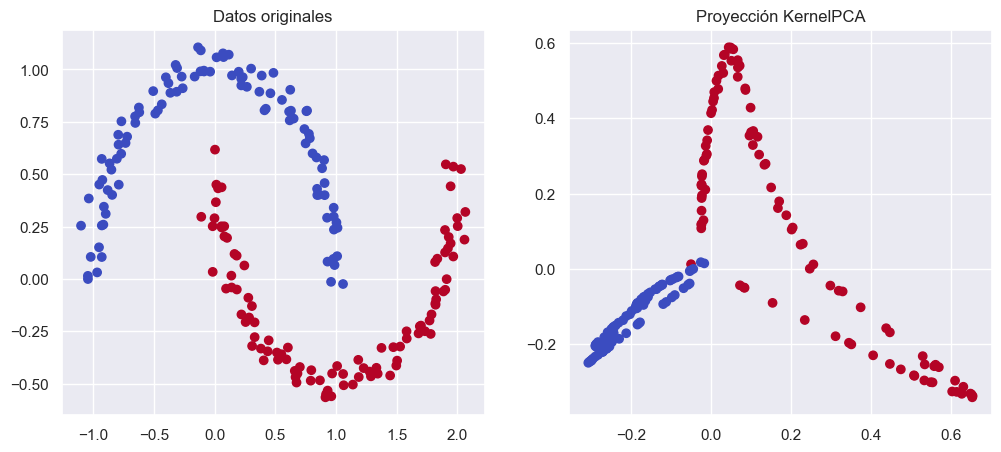

In [76]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_moons)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap='coolwarm')
plt.title('Datos originales')
plt.subplot(1,2,2)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y_moons, cmap='coolwarm')
plt.title('Proyección KernelPCA')
plt.show()

Algunas limitaciones son: que puede ser costoso en memoria y cómputo para grandes datasets y que la elección del kernel y sus parámetros es crucial.

### IncrementalPCA: PCA para grandes volúmenes de datos

El PCA estándar requiere cargar toda la matriz de datos en memoria, lo cual es inviable para datasets muy grandes. IncrementalPCA procesa los datos en pequeños lotes (batches), actualizando los componentes principales de manera incremental. Esto permite aplicar PCA a datos que no caben en memoria.

**Ventajas:**
- Escalable a grandes volúmenes de datos.
- Permite procesamiento en streaming o por lotes.


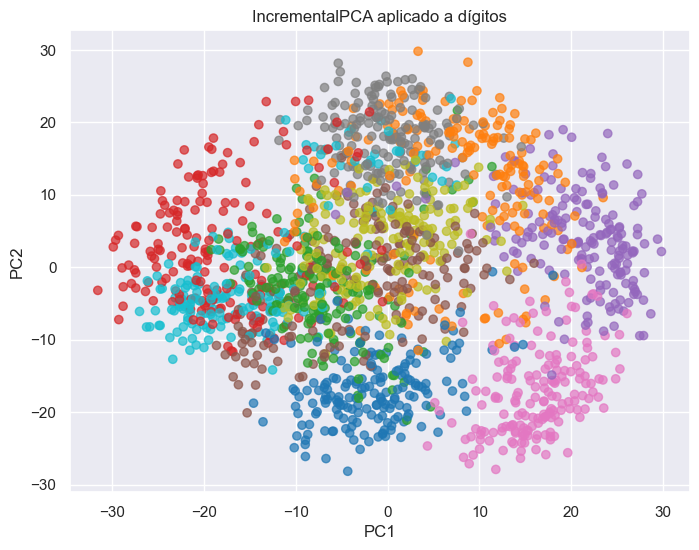

In [77]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=100)
X_ipca = ipca.fit_transform(image_data)

plt.figure(figsize=(8,6))
plt.scatter(X_ipca[:,0], X_ipca[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('IncrementalPCA aplicado a dígitos')
plt.show()

Puede ser menos preciso que el PCA estándar si el tamaño de lote es muy pequeño.  Solo implementa la versión lineal de PCA.

Ejemplos donde se pueden utilizar es: en procesamiento de imágenes, señales o datos de sensores en tiempo real.

### SparsePCA: Componentes principales esparsos

En muchos casos, es deseable que los componentes principales dependan solo de unas pocas variables originales para facilitar la interpretación (por ejemplo, en biología o finanzas).

SparsePCA agrega una penalización de esparsidad (L1) a la optimización de los componentes principales, forzando que muchos coeficientes sean exactamente cero, resuelve un problema de optimización similar a PCA pero con una restricción de esparsidad:

$$
\max_{w} \quad w^T C w \quad \text{sujeto a} \quad \|w\|_2 = 1, \ \|w\|_1 \leq t
$$
donde $C$ es la matriz de covarianza y $t$ controla la esparsidad.

**Ventajas:**
- Facilita la interpretación de los componentes.
- Útil cuando se sospecha que solo unas pocas variables son relevantes.

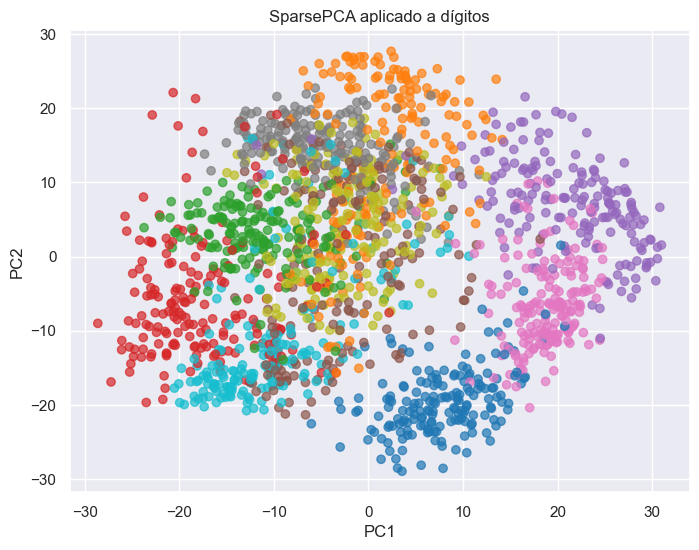

In [78]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=2, random_state=42)
X_spca = spca.fit_transform(image_data)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:,0], X_spca[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SparsePCA aplicado a dígitos')
plt.show()

Puede ser más costoso computacionalmente, además los resultados pueden depender fuertemente del parámetro de regularización.


## Resumen de PCA

- **Reducción de dimensionalidad:** Permite representar los datos en menos dimensiones conservando la mayor parte de la varianza.
- **Eliminación de redundancia:** Los componentes principales son ortogonales (no correlacionados).
- **Visualización:** Facilita la visualización de datos multidimensionales.
- **Preprocesamiento:** Puede mejorar el desempeño de modelos al eliminar ruido y multicolinealidad.
- Las variantes como **KernelPCA**, **IncrementalPCA** y **SparsePCA** permiten abordar problemas no lineales, grandes volúmenes de datos y mejorar la interpretabilidad.
- La selección del número de componentes es clave y puede guiarse por la varianza explicada acumulada.
#### Algunos Riesgos a considerar de PCA
- Los componentes principales pueden ser difíciles de interpretar.
- PCA es una transformación lineal: no captura relaciones no lineales.
- PCA reduce la dimensionalidad del espacio de características buscando patrones de correlación lineal entre las características. Dado que implica la descomposición en valores singulares (SVD), el cálculo de PCA es costoso para más de unos pocos miles de características. Sin embargo, para un pequeño número de características con valores reales, definitivamente vale la pena intentarlo.
